# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

I **Team_JM1**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

---

<figure>
<img src="climate_change.jpg" width="800px">
    <figcaption><p text_align = "center">

### Climate Change
Climate is the average weather in a place over many years. Climate change is a shift in those average conditions.

The rapid climate change we are now seeing is caused by humans using oil, gas and coal for their homes, factories and transport.

When these fossil fuels burn, they release greenhouse gases - mostly carbon dioxide (CO2). These gases trap the Sun's heat and cause the planet's temperature to rise.

### Predict Overview: Climate Change Belief Analysis 2022
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received. Our company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of predicting tweets;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [ ]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="QhbV5Xil65qBuiAZELjDI9FbR",
    project_name="general",
    workspace="ashafa1905,
    log_code = True
)

# Run your code and go to /

In [2]:
#import nltk
#nltk.download()


In [119]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Libraries for assessing model accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.utils import resample
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

**2.1 Brief description of the data**

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

**Class Description**

>2 News: the tweet links to factual news about climate change

>1 Pro: the tweet supports the belief of man-made climate change

>0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

>-1 Anti: the tweet does not believe in man-made climate change

**Variable definitions**

>sentiment: Sentiment of tweet

>message: Tweet body

>tweetid: Twitter unique id

In [4]:
# load the data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
samplesubmission = pd.read_csv('data/sample_submission.csv')

# Preview train dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
# Preview train dataset
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [6]:
# Preview train dataset
samplesubmission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In this section train, test and samplesubmission data have been uploaded to have a snap shot of how the data looks like. The train data will be used to train the model and the test data will be used to test the accuracy of the model in predicting unseen data. The sample submission file will aid in uploading the model in Kaggle.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Exploratory Data Analysis
>>>*What is Exploratory data analysis?*

>>>Exploratory data analysis (EDA) is the process of analysing and investigating data sets and summarizing their main characteristics, often employing both non-graphical and graphical methods. 

>>>*Why is conducting EDA important?*

>>>It aids in determining how best to manipulate data to get the required answers, expose trends, patterns, and relationships that are not readily apparent i.e. get insights into the dataset.

>>>*How is EDA conducted?*

EDA can be conducted in the following ways:
- **Univariate**:- \
    i. **non-graphical**:- This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.\
    ii. **graphical**:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.
- **Multivariate**:-  \
    i. **non-graphical**:- Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics. \
    ii. **graphical**:- Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

### 3.2 Univariate Non-Graphical Analysis
>For this analysis, we are going to view dataset on the below checks:  \
    >>i.  Check for the presence of *null* values  \
    >>ii. Descriptive statistical values *mean, std, minimum, quatiles, maximum, and kurtosis*  
    >>iii. Dataset data types

In [7]:
# Check data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The dataset has 3 features namely sentiment, message, tweetid. The features have 15819 entries and they have no missing values. The message feature has an object datetype i.e. that the features has mixed data types(numbers and strings).  

In [8]:
# look at data statistics
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This confirms that the dataset features have no missing values.

 **Descriptive Statistics**

>Descriptive statistics summarize the data by computing mean, median, mode, standard deviation likewise.descriptive statistics describe the dataset in a way simpler manner through;

*   The measure of central tendency 
>*  Mean:- The average value 
>*  Median:- The mid point value 
>*  Mode:- The most common value

*   Measure of spread  
>* Percentiles:- Percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than.
>* standard deviation:-a number that describes how spread out the values are.
*  Measure of symmetry 
>* Skewness:- a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
>>* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
>>* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
>>* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. 
*  Measure of Peakedness 
>* Kurtosis:-  a measure of relative peakedness of a probability distribution, or alternatively how heavy or how light its tails are. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad).
>>








In [9]:
# look at data statistics
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sentiment,15819.0,NaN,NaN,NaN,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
message,15819,14229,RT @StephenSchlegel: she's thinking about how ...,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tweetid,15819.0,NaN,NaN,NaN,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [10]:
df_train.kurtosis()

sentiment    0.122976
tweetid     -1.193356
dtype: float64

From the above analysis thus far, it is evidence that we only have two numeric colunms. 
However we suspect that one of these columns(tweetid) contains unique values in each row, while the other column(sentiment) from the name, we infere that it is our label, hence contains a minimum of two different values.

>To confirm the above, we write a function that takes in a dataframe and a column-id, to give an output which is the number of unique values in the column as an integer.

In [11]:
def unique_val(df, col):
    """
        This function takes in a dataframe and a column name, 
        and ouputs an interger, which is the number of unique 
        values in the column.
    """
    return df[col].nunique()

In [12]:
# Check the numbers of unique values for the sentiment column
print(f'The numbers of unique values in the sentiment column is : {unique_val(df_train, "sentiment")}')

The numbers of unique values in the sentiment column is : 4


In [13]:
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

From the codes above the sentiment feature has four unique values. Most observations are pro climate change indicated by 1. There is also an indication of class imbalance i.e. the number of observations across the classes(1,2,0,-1) is unevenly distributed.

### 3.3 Univariate graphical inspection of data
>For this analysis, we view the individual colunms using histogram plot.

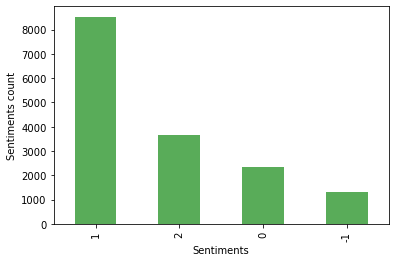

In [14]:
# Bar plot of label classes
fig,ax = plt.subplots()
df_train['sentiment'].value_counts().plot(kind = 'bar', facecolor='g', alpha=0.65)
ax.set_xlabel('Sentiments')
ax.set_ylabel('Sentiments count')
plt.show()

### 3.4 Put in Word Cloud Below

In [15]:
# Create new dataframe for word cloud
df_train_cloud = df_train.copy()
df_train_cloud.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


The use of preprocessed data in Word Cloud makes it easy to identify the relevant words as opposed to many instances of https and other types of noise. 

In [16]:
# Preproceessing functions
def preprocess_tweet(df, col):
    """ Functions takes in a pandas dataframe and performs a series of steps on 
        the tweet/message/text column"""
    # Converting the whole text to lowercase
    df[col] = df[col]. apply(lambda x: x.lower())

    # Removing the twitter usernames from tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'@\w+', ' ', x))

    # Removing the URLS from the tweet string
    df[col] = df[col]. apply(lambda x: re.sub(r'http\S+', ' ', x))

    # Deleting everything that is not characters
    df[col] = df[col]. apply(lambda x: re.sub(r'[^a-z A-Z]', ' ', x))

    # Deleting any word which is less than 3-characters mostly those are stopwords
    df[col] = df[col]. apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

    # Stripping extra spaces in the text
    df[col] = df[col]. apply(lambda x: re.sub(r' +', ' ', x))
    
    return df

preprocess_tweet(df_train_cloud, 'message')

df_train_cloud.head()




,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn think carbon diox...,625221
1,1,not like lack evidence anthropogenic global w...,126103
2,2,researchers say have three years act climate ...,698562
3,1,todayinmaker wired was pivotal year the war c...,573736
4,1,and racist sexist climate change denying bigo...,466954


(-0.5, 399.5, 199.5, -0.5)

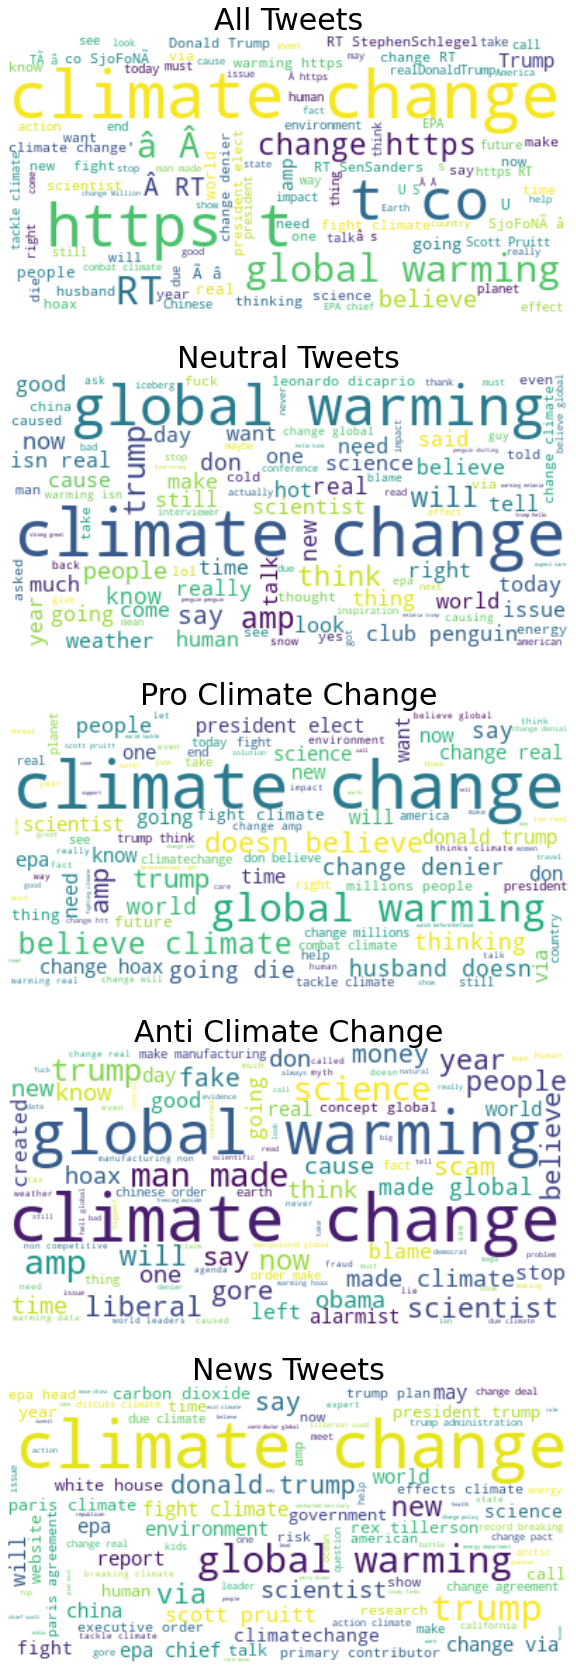

In [17]:
# Create DataFrame for Each Sentiment
df_sent1 = df_train_cloud[df_train_cloud['sentiment']==1]
df_sent0 = df_train_cloud[df_train_cloud['sentiment']==0]
df_sentneg = df_train_cloud[df_train_cloud['sentiment']==-1]
df_sent2 = df_train_cloud[df_train_cloud['sentiment']==2]

tweet_All = " ".join(review for review in df_train.message)
tweet_sent0 = " ".join(review for review in df_sent0.message)
tweet_sent1 = " ".join(review for review in df_sent1.message)
tweet_sentneg = " ".join(review for review in df_sentneg.message)
tweet_sent2 = " ".join(review for review in df_sent2.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_sent0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent0)
wordcloud_sent1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent1)
wordcloud_sentneg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sentneg)
wordcloud_sent2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sent2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_sent0, interpolation='bilinear')
ax[1].set_title('Neutral Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_sent1, interpolation='bilinear')
ax[2].set_title('Pro Climate Change',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_sentneg, interpolation='bilinear')
ax[3].set_title('Anti Climate Change',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_sent2, interpolation='bilinear')
ax[4].set_title('News Tweets',fontsize=30)
ax[4].axis('off')

#wordcloud.to_file("img/first_review.png")

Important Takeaways:

- Words like climate change and global warming that appear in all categories. They are general words that are associated with conversations about climate change.
- The removal of words that appear in all categories and stopwords is likely to have no effect on the performance of the classification model.
- There is a need to reduce the categories in sentiment feature because the goal is to define whethere there is a positive sentiment or not.

### 3.5 Key Insights from EDA
>* The tweets contain punctuation marks and web urls.
>* The tweet text is in mixed case version i.e. both lower and uppercase.
>* The dataset contains three columns (sentiments, message and tweetid)
>* Sentiments and tweetid are of numeric data type, while message is non-numeric
>*Tweetid is a column with uniques values across the entire rows of the dataset
>* Sentiments columns contains for different unique class (-1, 0, 1 &2) with different sizes.
>* The is uneven distribution of observations among the classes in the sentiment column.

### 3.6 What's next?
Based on the insights from EDA the following steps will be executed in the data engineering section:-

>* Creation of new features to inform text preprocessing
>* Text preprocessing will be done as follows:-
>>* Text cleaning
>>* Tokenization
>>* Stemming
>>* Lemmatization
>>* Bag of words

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## 4.1 Creating new features

### 4.2 Text Cleaning


#### 4.2.1 Removing Noise
>The real world data contains irrelevant or meaningless data termed as noise which can significantly affect various data
analysis tasks of machine learning are classification, clustering and association analysis.Therefore, by removing noise, only the necessary data for analysis is left. For the given dataset, we identified that the *message* column contains the novel tweet for each userid, which we are espected to classify. 
For us to proceed we have to carry out cleaning on this messages. This cleaning will be achieved through:
* identify and remove web-urls from the main message 
* idendify and remove words started with '#'
* idendify and remove words started with '@'
* making everything lower case
* removing punctuation


##### 4.2.1.1 Remove web-url from message

>In removing web_url we use regular expressions.Regular Expressions, also known as “regex” or “regexp”, are used to match strings of text such as particular characters, words, or patterns of characters. They aid in matching and extracting any string pattern from the text.

>We write a function called *delete_url* that uses regex to identify web-url in a column and remove same from the column.

In [18]:
def delete_url(data, col):
    """
        Accepts a dataframe and col., removes web urls from the col.
        returns a new dataframe 
    """
    df = data.copy()
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ''
    df[col] = df[col].replace(to_replace = pattern_url, value = subs_url, regex = True)
    return df

In [19]:
# Create a new dataframe with message column void of url links
new_df_train = delete_url(df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [20]:
# Confirm that the above operation was successful 
new_df_train['message'][0]

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!?  via @mashable"

In [21]:
df_train['message'][0]

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

##### 4.2.1.2 Remove '#' and '@' words

>We write a function *delete_tags*, to identify and remove words started with '#' and '@' using regex.

In [22]:
def delete_tags(data, col):
    """
        This function takes in a dataframe and a column, removes all words started with '#' and '@' in the column,
        and returns a new dataframe
    """
    df = data.copy()
    pattern_tags = r'#\w+[#?]'
    pattern_2 = r'@\w+'
    subs_tag = ''
    df[col] = df[col].replace(to_replace = pattern_tags, value = subs_tag, regex = True)
    df[col] = df[col].replace(to_replace = pattern_2, value = subs_tag, regex = True)
    return df

In [23]:
# Create a new dataframe with message column void of url links
new_df_train = delete_tags(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT : Researchers say we have three years to ac...,698562
3,1,WIRED : 2016 was a pivotal year in the war on...,573736
4,1,"RT : It's 2016, and a racist, sexist, climate ...",466954


##### 4.2.1.3 Convert capitalized words to lowercase words

>We write a function *word_converter* to convert capitalized words to lowercase words using the string method .lower().

In [24]:
def word_converter(data, col):
    """
        This function takes in a dataframe and col, converts all capitalized words in the column to lowercase,
        and returns a new dataframe.
    """
    df = data.copy()
    df[col] = df[col].str.lower()
    return df

In [25]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_train = word_converter(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt : researchers say we have three years to ac...,698562
3,1,wired : 2016 was a pivotal year in the war on...,573736
4,1,"rt : it's 2016, and a racist, sexist, climate ...",466954


##### 4.2.1.4 Remove punctuation

>We write a function *remove_punc* that uses the string package from python to remove punctions.

In [26]:
def remove_punc(data, col):
    """
        This function takes in a dataframe and a column, uses python string package to identify and remove all
        punctions in the column. It returns a new dataframe
    """
    def operation(post):
        return ''.join([l for l in post if l not in string.punctuation])
    
    df = data.copy()
    
    df[col] = df[col].apply(operation)
    return df

In [27]:
# Create a new dataframe with the message colmn void of punctuations
new_df_train = remove_punc(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,wired 2016 was a pivotal year in the war on ...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


Remove new lines (\n) and 'rt' from the start of any words
We noticed that some words start with '\n' and this is a short form for new line in programming, words started with \n looses its original meaning.

Hence we write a function remove_new_line to execute this task.

In [98]:
def remove_new_line(data, col):
    """
        Takes in a dataframe and a column, returns a new dataframe with a new column void of new line command
    """

    def operation(text):
        result = re.sub("\n", "", text)
        result = re.sub("rt", "", result)
        return result

    df = data.copy()
    
    df[col] = df[col].apply(operation)

    return df

In [99]:
# Create a new dataframe with the message colmn void of punctuations
new_df_train = remove_new_line(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,message_no_stop,de_tok,no_stop_word
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm,"[like, lack, evid, anthropogen, global, warm]"
2,2,researchers say we have three years to act o...,698562,"[rt, researchers, say, we, have, three, years,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, three, year, act, climat, ...",rt research say three year act climat chang be...,"[rt, research, say, three, year, act, climat, ..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,...","[wire, 2016, wa, pivot, year, war, climat, chang]",wire 2016 wa pivot year war climat chang,"[wire, 2016, wa, pivot, year, war, climat, chang]"
4,1,its 2016 and a racist sexist climate change ...,466954,"[rt, its, 2016, and, a, racist, sexist, climat...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, 2016, racist, sexist, climat, chang, deni...",rt 2016 racist sexist climat chang deni bigot ...,"[rt, 2016, racist, sexist, climat, chang, deni..."


### 4.3 Tokenisation
>Tokenization refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.
We write a function *tokenizer* to tokenize the words in the message column and store same in a new column named *message_tok*

In [100]:
def tokenizer(data, col):
    """
        This function takes in a dataframe and a col, creates a new column to store the tokenized words
        in the inputed column, and returns a new dataframe.
    """
    df = data.copy()
    tokeniser = TreebankWordTokenizer()
    df['message_tok'] = df[col].apply(tokeniser.tokenize)
    return df

In [101]:
# Create a new column to hold the tokens from message column
new_df_train = tokenizer(new_df_train, 'message')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,message_no_stop,de_tok,no_stop_word
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm,"[like, lack, evid, anthropogen, global, warm]"
2,2,researchers say we have three years to act o...,698562,"[researchers, say, we, have, three, years, to,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, three, year, act, climat, ...",rt research say three year act climat chang be...,"[rt, research, say, three, year, act, climat, ..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,...","[wire, 2016, wa, pivot, year, war, climat, chang]",wire 2016 wa pivot year war climat chang,"[wire, 2016, wa, pivot, year, war, climat, chang]"
4,1,its 2016 and a racist sexist climate change ...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, 2016, racist, sexist, climat, chang, deni...",rt 2016 racist sexist climat chang deni bigot ...,"[rt, 2016, racist, sexist, climat, chang, deni..."


### 4.4 Stemming
>Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language.

>We write a function *stem_words* to transform all words in the *message_tok* column to its root form.

In [102]:
def stem_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of SnowballStemmer class from the nltk package.
        Returns a new dataframe with an additional column "message_stem"
    """
    stemmer = SnowballStemmer('english')
    def operation(words, stemmer):
        return [stemmer.stem(word) for word in words]
    
    df = data.copy()
    df["message_stem"] = df[col].apply(operation, args=(stemmer, ))
    
    return df

In [103]:
# Create a new column to hold root words from stemmer
new_df_train = stem_words(new_df_train, 'message_tok')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,message_no_stop,de_tok,no_stop_word
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm,"[like, lack, evid, anthropogen, global, warm]"
2,2,researchers say we have three years to act o...,698562,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[rt, research, say, we, have, three, year, to,...","[rt, research, say, three, year, act, climat, ...",rt research say three year act climat chang be...,"[rt, research, say, three, year, act, climat, ..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, 2016, wa, a, pivot, year, in, the, war,...","[wire, 2016, wa, pivot, year, war, climat, chang]",wire 2016 wa pivot year war climat chang,"[wire, 2016, wa, pivot, year, war, climat, chang]"
4,1,its 2016 and a racist sexist climate change ...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, 2016, and, a, racist, sexist, climat, cha...","[rt, it, 2016, and, a, racist, sexist, climat,...","[rt, 2016, racist, sexist, climat, chang, deni...",rt 2016 racist sexist climat chang deni bigot ...,"[rt, 2016, racist, sexist, climat, chang, deni..."


### 4.5 Lemmatization
>Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

>We write a function *lam_words* to transform all words in the *message_tok* column to its root form using Lemmatization, to enable us acrter for the shortfall in stemming above.

In [104]:
def lam_words(data, col):
    """
        Takes in a dataframe and a column, converts the words in the column to it root form,
        with the aid of WordNetLemmatizer class from the nltk package.
        Returns a new dataframe with an additional column "message_lam"
    """
    lemmatizer = WordNetLemmatizer()
    def operation(words, lemmatizer):
        return [lemmatizer.lemmatize(word) for word in words] 
    df = data.copy()
    df["message_lam"] = df[col].apply(operation, args=(lemmatizer, ))
    
    return df

In [105]:
# Create a new column to hold root words from stemmer
new_df_train = lam_words(new_df_train, 'message_tok')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,message_no_stop,de_tok,no_stop_word
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm,"[like, lack, evid, anthropogen, global, warm]"
2,2,researchers say we have three years to act o...,698562,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a...","[rt, research, say, three, year, act, climat, ...",rt research say three year act climat chang be...,"[rt, research, say, three, year, act, climat, ..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wired, 2016, wa, a, pivotal, year, in, the, w...","[wire, 2016, wa, pivot, year, war, climat, chang]",wire 2016 wa pivot year war climat chang,"[wire, 2016, wa, pivot, year, war, climat, chang]"
4,1,its 2016 and a racist sexist climate change ...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, 2016, and, a, racist, sexist, climate, ch...","[rt, 2016, racist, sexist, climat, chang, deni...",rt 2016 racist sexist climat chang deni bigot ...,"[rt, 2016, racist, sexist, climat, chang, deni..."


### 4.6 Remove stop words here
>Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. The stop words are removed using the stop words dictionary in the nltk library.

>We use the *remove_stop_words* function.

In [106]:
def remove_stop_words(data, col):
    """
        Takes a dataframe and a column, creates a new dataframe with a new column no_stop_word from the input
        dataframe and column, returns the new column
    """
    def operation(toks):
        new_toks = [tok for tok in toks if tok not in stopwords.words('english')]
        return new_toks
    
    df = data.copy()
    df['no_stop_word'] = df[col].apply(operation)

    return df

In [107]:
# Create a new column from message_lam void of stop words
new_df_train = remove_stop_words(new_df_train, 'message_lam')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,message_no_stop,de_tok,no_stop_word
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro...","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm,"[like, lack, evidence, anthropogenic, global, ..."
2,2,researchers say we have three years to act o...,698562,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a...","[rt, research, say, three, year, act, climat, ...",rt research say three year act climat chang be...,"[researcher, say, three, year, act, climate, c..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wired, 2016, wa, a, pivotal, year, in, the, w...","[wire, 2016, wa, pivot, year, war, climat, chang]",wire 2016 wa pivot year war climat chang,"[wired, 2016, wa, pivotal, year, war, climate,..."
4,1,its 2016 and a racist sexist climate change ...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, 2016, and, a, racist, sexist, climate, ch...","[rt, 2016, racist, sexist, climat, chang, deni...",rt 2016 racist sexist climat chang deni bigot ...,"[2016, racist, sexist, climate, change, denyin..."


Check for the presence of noise as non-alphanumeric worlds

In [108]:
def word_type_checker(data, col):
    alphanum_count = 0 
    non_alphanum_count = 0
    
    def operation(str_list , alphanum_count ,non_alphanum_count):
        alphanum = alphanum_count
        non_aphanum = non_alphanum_count
#         print(f'past row values: {(alphanum, non_aphanum)}') # for testing 
        for strg in str_list:
            if strg.isalnum():
                alphanum = alphanum + 1
            else:
                non_aphanum = non_aphanum + 1
        
        return (alphanum ,non_aphanum)
    
    for label, sr in data.iterrows():
        (alphanum_count, non_alphanum_count) = operation(sr[col] , alphanum_count, non_alphanum_count)
#         Uncomment the codes below for testing of this function
#         print(f'accumulated values: {(alphanum_count, non_alphanum_count)}') 
#         if label == 20:
#             break
    
    return (alphanum_count, non_alphanum_count)

In [109]:
(alphanumeric, non_alphanumeric) = word_type_checker(new_df_train, 'no_stop_word')
(alphanumeric, non_alphanumeric)

(155383, 9703)

### 4.8 Transforming text into numbers

Most models do not work well with text, hence the need to convert our text into numbers. To execute this task and more, we use **CountVectorizer** a package from sklearn library.
**CountVectorizer** has some **hyperparameters** which we can asign desired values to while initialising. 
The **hyperparameters** that we shall be tunning for these work are: 

- **max_df** :  When building the vocabulary ignore terms that have a document frequency strictly higher than the                     given threshold (corpus-specific stop words). If float, the parameter represents a proportion of                       documents,integer absolute counts.This parameter is ignored if vocabulary is not None.

- **min_df** :  When building the vocabulary ignore terms that have a document frequency strictly lower than the given                 threshold. This value is also called cut-off in the literature. If float, the parameter represents a                   proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

- **max_features**: If not None, build a vocabulary that only consider the top max_features ordered by term frequency                     across the corpus. This parameter is ignored if vocabulary is not None.

- **analyzer**: Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates                       character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with                 space.

- **ngram_range**: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to                    be extracted.

In [110]:
vect_df = CountVectorizer(max_features=20000,analyzer='word', ngram_range=(1, 2))
vect_downsampled = CountVectorizer(max_features=20000,analyzer='word', ngram_range=(1, 2))
vect_upsampled = CountVectorizer(max_features=20000,analyzer='word', ngram_range=(1, 2))

**Convert processed words to corpus**

>Before we can transform the words in numeric type, for each column we have to remove the delimeters introduced during tokennization. This process is needed to enable us form a **corpus**.
To achieve this, we write a function **form_corpus**.

In [111]:
def form_corpus(data, col):
    """
        This function takes in a dataframe and a column with tokenized text, 
        returns a new dataframe with an additional column(de_tok), which is made up of all words in the inserted colunm
        but void of delimeters.
    """
    def operation(tok_list):
        string = ' '.join(tok_list)
        return string
    df = data.copy()
    df['de_tok'] = df[col].apply(operation)
    
    return df

In [112]:
# Create a new column from no_stop_word void of delimeters
new_df_train = form_corpus(new_df_train, 'no_stop_word')
new_df_train.head()

,sentiment,message,tweetid,message_tok,message_stem,message_lam,message_no_stop,de_tok,no_stop_word
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro...","[like, lack, evid, anthropogen, global, warm]",like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ..."
2,2,researchers say we have three years to act o...,698562,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a...","[rt, research, say, three, year, act, climat, ...",researcher say three year act climate change i...,"[researcher, say, three, year, act, climate, c..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wired, 2016, wa, a, pivotal, year, in, the, w...","[wire, 2016, wa, pivot, year, war, climat, chang]",wired 2016 wa pivotal year war climate change,"[wired, 2016, wa, pivotal, year, war, climate,..."
4,1,its 2016 and a racist sexist climate change ...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, 2016, and, a, racist, sexist, climate, ch...","[rt, 2016, racist, sexist, climat, chang, deni...",2016 racist sexist climate change denying bigo...,"[2016, racist, sexist, climate, change, denyin..."


In [113]:
# Drop every other columns except sentiment and de_tok columns
df_train_reduced = new_df_train[['sentiment', 'de_tok']]
df_train_reduced.head()

,sentiment,de_tok
0,1,polyscimajor epa chief doesnt think carbon dio...
1,1,like lack evidence anthropogenic global warming
2,2,researcher say three year act climate change i...
3,1,wired 2016 wa pivotal year war climate change
4,1,2016 racist sexist climate change denying bigo...


### 4.9 Resampling
> During EDA we discovered that our data had imbalanced class distribution. This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes. This could result in our predictive model being biased and inaccurate. The model will tend to only predict the majority class data and ignore the minority class which will be treated as noise. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

> This can be corrected by:-
- **Downsampling the majority class:-**Random Undersampling/Downsampling aims to balance class distribution by randomly eliminating majority class observations. This is done until the majority and minority class instances are balanced out.

>**Advantages:-**
>>1. It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

>**Disadvantages:-**
>>1. It can discard potentially useful information which could be important for building rule classifiers.

>>2. The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.

- **Upsampling the minority class:-**Over-Sampling/Upsampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

>**Advantages**

>>1. Unlike under sampling this method leads to no information loss.
>>2. Outperforms under sampling

>**Disadvantages**
>>1. It increases the likelihood of overfitting since it replicates the minority class events.

To achieve the above, we write a multipurpose function called **resampler**, which we can use for both **Downsampling** and **Upsampling**

In [120]:
def resampler(df_list, n_sample, replace=False):
    """
        This function takes a list of dataframe, the size which we intend to resize all dataframes in the list to, and
        an optional replace[bool] value, which is set to True for upsampling
        It returns a tuple of new dataframes with sizes equivalent to the value for n_sample
    """
    
    def operation(df):
        downsampled_df = resample(df,
                          replace= replace, # sample without replacement (no need to duplicate observations)
                          n_samples=n_sample, # match number in minority class
                          random_state= RANDOM_STATE) # reproducible results
        return downsampled_df
    
    resampled_dfs = tuple(map(operation , df_list))
    
    return resampled_dfs

*Create new dataframes*

We create new dataframes based on sentiment type.

In [121]:
pro = df_train_reduced[df_train_reduced['sentiment'] == 1]
anti = df_train_reduced[df_train_reduced['sentiment'] == -1]
neutral = df_train_reduced[df_train_reduced['sentiment'] == 0]
info =  df_train_reduced[df_train_reduced['sentiment'] == 2]

*Downsampling*
    

In [122]:
# Downsample pro, infor and neutral dataframe 
(pro_df, info_df, neut_df) = resampler([pro,info,neutral], len(anti))

# Combine downsampled majority class with minority class
downsampled = pd.concat([pro_df, info_df, neut_df,anti])

# Check new class counts
downsampled['sentiment'].value_counts()

 1    1296
 2    1296
 0    1296
-1    1296
Name: sentiment, dtype: int64

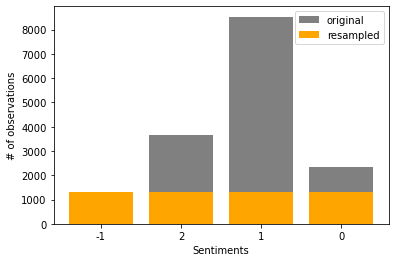

In [123]:
# visualise the downsampled dataframe
original_height = [len(pro), len(neutral), len(info), len(anti)]
downsampled_heights = [len(downsampled[downsampled['sentiment']==1]),len(downsampled[downsampled['sentiment']==0]),
                      len(downsampled[downsampled['sentiment']==2]) ,len(downsampled[downsampled['sentiment']==-1])]

# Get all possible labels
labels = downsampled['sentiment'].unique()
plt.bar(labels,original_height,color='grey')
plt.bar(labels,downsampled_heights,color='orange')
plt.xticks(labels,[1,0, 2, -1])
plt.ylabel("# of observations")
plt.xlabel("Sentiments")
plt.legend(['original','resampled'])
plt.show()

*Upsampling*

In [124]:
# upsample info, neutral and anti dataframe 
(up_info_df, up_neut_df, up_anti_df) = resampler([info,neutral, anti], len(pro), True)

# Combine downsampled majority class with minority class
upsampled = pd.concat([pro, up_info_df, up_neut_df,up_anti_df])

# Check new class counts
upsampled['sentiment'].value_counts()

 1    8530
 2    8530
 0    8530
-1    8530
Name: sentiment, dtype: int64

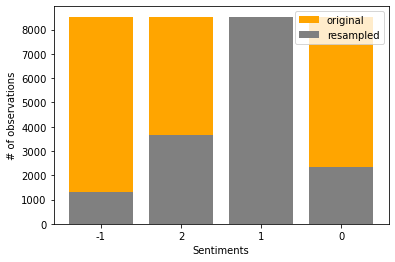

In [125]:
# visualise the upnsampled dataframe
original_height = [len(pro), len(neutral), len(info), len(anti)]
upsampled_heights = [len(upsampled[upsampled['sentiment']==1]),len(upsampled[upsampled['sentiment']==0]),
                      len(upsampled[upsampled['sentiment']==2]) ,len(upsampled[upsampled['sentiment']==-1])]

# Get all possible labels
labels = upsampled['sentiment'].unique()
plt.bar(labels,upsampled_heights,color='orange')
plt.bar(labels,original_height,color='grey')
plt.xticks(labels,[1,0, 2, -1])
plt.ylabel("# of observations")
plt.xlabel("Sentiments")
plt.legend(['original','resampled'])
plt.show()